<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
sns.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [3]:
dataset = pd.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [7]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [8]:
dataset = dataset[important_cols].replace('-', np.nan)
for score_col in score_cols:
  dataset[score_col] = pd.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

### 1) Para el primer ejercicio vemos un descriptivo de los datos donde podremos ver el rango en los valores 'max' y 'min'
Como se puede observar todos los scores van de 0 a 10. Las variables rank van de 1 a 162, la cantidad de países en estudio. Para las variables 'rank', no tiene sentido ver medidas de posición y dispersión ya que su escala es ordinal. 

In [9]:
dataset.describe().round(2)

,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
count,1620.00,308.00,1537.00,1540.00,1540.00,1519.00,1540.00,1540.00,1540.00,1540.00,1540.00,1540.00,1540.00
mean,2012.50,6.38,6.70,7.92,7.31,7.49,7.28,7.16,77.67,6.79,77.42,6.98,77.47
std,2.87,3.64,4.69,4.04,4.06,3.50,3.18,1.39,44.76,0.91,44.78,1.06,44.78
min,2008.00,0.00,0.00,0.00,0.00,0.00,0.00,2.22,1.00,2.58,1.00,3.69,1.00
25%,2010.00,7.00,0.00,10.00,5.00,5.00,5.00,6.15,39.00,6.22,39.00,6.28,39.00
50%,2012.50,7.00,10.00,10.00,10.00,10.00,8.80,7.14,77.50,6.88,77.00,6.90,77.00
75%,2015.00,10.00,10.00,10.00,10.00,10.00,10.00,8.38,116.00,7.44,116.00,7.88,116.00
max,2017.00,10.00,10.00,10.00,10.00,10.00,10.00,9.56,162.00,9.11,162.00,9.12,162.00


### 2) Para cada país, tenemos varias realizaciones para cada variable pf_identity y hf_score. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana?
Las comparaciones entre paises/regiones se pueden hacer para un sólo año o también a través del tiempo. Depende de cual sea el objetivo de la comparación.
por ejemplo, si quisiéramos comparar como evolucionaron las regiones en el tiempo deberíamos usar los valores para todos los años. Si quisieramos hacer una comparación puntual, podríamos tomar un año o utilizar medidas resumen para resumir todos o algunos de los años y realizar las comparaciones

A continuación calculamos la media y mediana por paises

In [10]:
_dataset_pf_hf= dataset[[ 'countries','pf_identity',  'hf_score']]
_media_x_paises_pf_hf = _dataset_pf_hf.groupby('countries').mean()

print(_media_x_paises_pf_hf)


             pf_identity  hf_score
countries                         
Albania             7.90   7.63100
Algeria             1.17   5.16500
Angola              5.34   5.44200
Argentina          10.00   6.76600
Armenia             8.62   7.44300
...                  ...       ...
Venezuela           8.76   4.71200
Vietnam             9.72   6.19400
Yemen, Rep.         0.00   4.60375
Zambia              4.83   6.63700
Zimbabwe            6.67   5.32200

[162 rows x 2 columns]


In [11]:
_dataset_pf_hf= dataset[[ 'countries','pf_identity',  'hf_score']]
_mediana_x_paises_pf_hf = _dataset_pf_hf.groupby('countries').median()

print(_mediana_x_paises_pf_hf)

             pf_identity  hf_score
countries                         
Albania              8.8     7.675
Algeria              1.3     5.180
Angola               5.0     5.420
Argentina           10.0     6.805
Armenia              8.8     7.425
...                  ...       ...
Venezuela           10.0     4.930
Vietnam             10.0     6.145
Yemen, Rep.          0.0     4.600
Zambia               5.0     6.660
Zimbabwe             7.5     5.320

[162 rows x 2 columns]


### 3) Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.

En este caso se tomarán todos los años de estudio para calcular las medidas resumen.
Creamos dos dataset uno para Latinoamérica y otro para todo los paises del mundo bajo estudio (incluyendo Latinoamerica)

In [12]:
df_latin=dataset[dataset['region']=='Latin America & the Caribbean']
df_world= dataset
df_world=df_world.assign(region="World")

df =pd.concat([df_latin, df_world], axis=0)

#### pf_identity

In [13]:
mean = df_latin.pf_identity.mean().round(2)
median = df_latin.pf_identity.median().round(2)
desv = df_latin.pf_identity.std().round(2)
cv = desv/mean
print("""
    Latin America & the Caribbean 
    Media: %.2f
    Mediana: %.2f
    Desviación Estándar: %.2f
    Coeficiente de Variación: %.2f
    
""" % (mean,median,desv,cv))

#################################################

mean = df_world.pf_identity.mean().round(2)
median = df_world.pf_identity.median().round(2)
desv = df_world.pf_identity.std().round(2)
cv = desv/mean
print("""
    World 
    Media: %.2f
    Mediana: %.2f
    Desviación Estándar: %.2f
    Coeficiente de Variación: %.2f
    
""" % (mean,median,desv,cv))




    Latin America & the Caribbean 
    Media: 8.58
    Mediana: 10.00
    Desviación Estándar: 1.88
    Coeficiente de Variación: 0.22
    


    World 
    Media: 7.28
    Mediana: 8.80
    Desviación Estándar: 3.18
    Coeficiente de Variación: 0.44
    



INDICADOR DE LIBERTAD DE IDENTIDAD
Podemos observar que la media de Latinoamérica es más alta que la de todo el mundo y a su vez menos dispersa. 
Esto significa que los países de latinoamérica tienen en promedio una mayor libertad de identidad que en en los paises del mundo. 
Ademas tienen como grupo, un comportamiento menos disperso que en el mundo. (A pesar de que las variables se encuentran bajo la misma unidad de medida, el coeficiente de variación nos permite comparar mejor la dispersión).
Por otro lado observamos que la mediana es mayor a la media, lo cual indica que la distribución no es normal y tiene una asimetría izquierda, indicando la presencia de paises con una baja libertad de identidad, y ademas sustancialmente diferente a la mayoria de los paises. 

### hf_score

In [14]:
mean = df_latin.hf_score.mean().round(2)
median = df_latin.hf_score.median().round(2)
desv = df_latin.hf_score.std().round(2)
cv = desv/mean
print("""
    Latin America & the Caribbean 
    Media: %.2f
    Mediana: %.2f
    Desviación Estándar: %.2f
    Coeficiente de Variación: %.2f
    
""" % (mean,median,desv,cv))

#################################################

mean = df_world.hf_score.mean().round(2)
median = df_world.hf_score.median().round(2)
desv = df_world.hf_score.std().round(2)
cv = desv/mean
print("""
    World 
    Media: %.2f
    Mediana: %.2f
    Desviación Estándar: %.2f
    Coeficiente de Variación: %.2f
    
""" % (mean,median,desv,cv))




    Latin America & the Caribbean 
    Media: 7.04
    Mediana: 7.02
    Desviación Estándar: 0.63
    Coeficiente de Variación: 0.09
    


    World 
    Media: 6.98
    Mediana: 6.90
    Desviación Estándar: 1.06
    Coeficiente de Variación: 0.15
    



INDICADOR DE LIBERTAD HUMANA
En este caso podemos observar que la medias medias para latinoamérica y todo el mundo son bastante similares. Al igual que en el caso anterior, la dispersión es menor en latinoamérica que en el total del mundo. Asimismo, se puede observar que el nivel de dispersión es bajo en ambos casos. 
También se puede observar en este caso que para ambas comparaciones la media y mediana toman valores similares, lo que indica una distribución más parecida a la campana de Gauss. En ambos casos se observa una leve asimetría derecha.

### 4)¿Tiene sentido calcular la moda?
No tendría sentido calcularlo sin transformar las variables ya que ambas son continuas. Si podemos calcular los intervalos modales. Lo podemos observar en los histrogramas. 

En el caso del indicador de libertad de identidad, se puede observar que tanto latinoamerica como el total del mundo comparten el mismo intervalo modal, pero al tener el total del mundo más valores ubicados a la izquierda de la distribución hace que su media sea menor a la de latinoamérica.

En el caso del indicador de libertad humana (y para la cantidad de intervalos elegidos) se observa para el total del mundo una distribución con dos intervalos modales. En el caso de latinoamérica se observa un sólo intervalo modal, el cual también incluye la mediana y la media, lo que previamente indicamos que indica una distribución similar a la campana de Gauss.

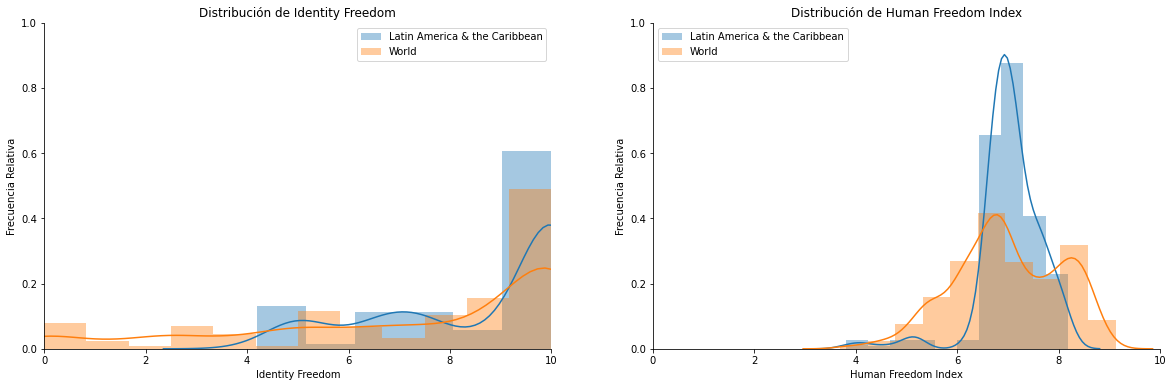

In [15]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
sns.distplot(
    df_latin.pf_identity, label='Latin America & the Caribbean') # 'Label' para imprimir la etiqueta de referencias
sns.distplot(
    df_world.pf_identity, label='World')
plt.legend() #Imprime la leyenda
plt.ylabel('Frecuencia Relativa')
plt.xlabel('Identity Freedom')
plt.title('Distribución de Identity Freedom')
plt.xticks(rotation=0)
plt.xlim(0, 10)
plt.ylim(0, 1)
sns.despine()

plt.subplot(1, 2, 2)
sns.distplot(
    df_latin.hf_score, label='Latin America & the Caribbean', bins=10) # 'Label' para imprimir la etiqueta de referencias
sns.distplot(
    df_world.hf_score, label='World', bins=10)
plt.legend() #Imprime la leyenda
plt.ylabel('Frecuencia Relativa')
plt.xlabel('Human Freedom Index')
plt.title('Distribución de Human Freedom Index')
plt.xticks(rotation=0)
plt.xlim(0, 10)
plt.ylim(0, 1)
sns.despine()


### 5) ¿Cómo pueden sanearse los valores faltantes?

Existen muchos metodos para sanear los valores faltantes y seleccionar uno de ellos depende de muchos factores que deben analizarse previamente.

En algunos casos suelen elimnarse los registros con valores faltantes, aunque esto podría generar sesgos

También pueden imputarse valores, algunos de los métodos más conocidos son:
La asignación de valores teóricos, que son determinamos por el conocimiento previo del investigador

Asignar la media a los valores faltantes, aunque hay que tener en cuenta que esto introduce distorsiones en la distribución de la variable y la estimación de la varianza. 

Asimismo, también influye en la correlación entre las variables
Otro método es estimarla mediante la regresión con otras variables aunque esto también introduce distorsiones en la estimación de la varianza e incrementa la correlación entre las variables.

En este caso, comencemos por observar cuando valores faltantes tenemos:

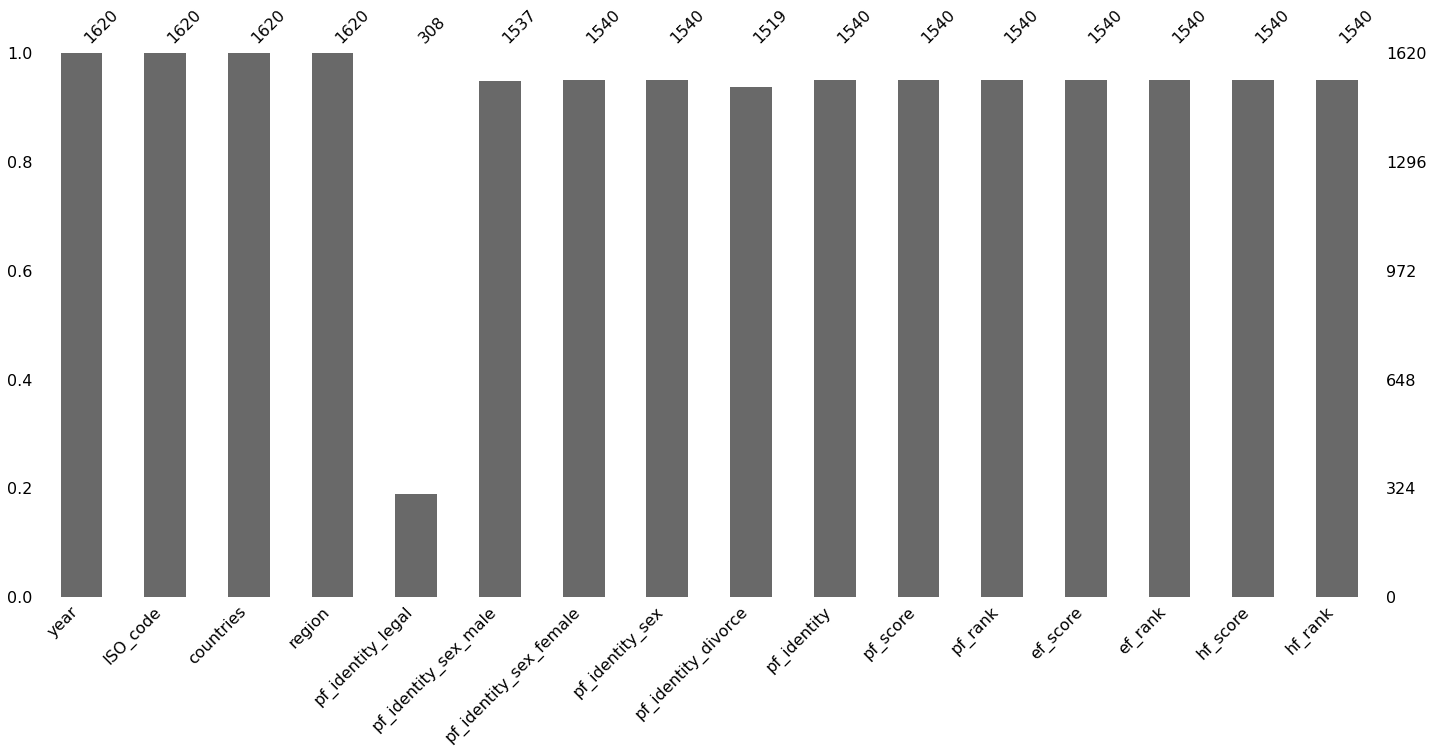

In [16]:
# Vemos Gráficamente cuantos valores faltantes tenemos y en que variables.
# La mayoría esta en la variable pf_identity_legal, en la cual no vamos a centrarnos en el análisis por ahora.
# En las demás, la cantidad de valores faltantes es bastante constante
import missingno as msno 
msno.bar(dataset) 

In [17]:
dataset[["hf_score", "pf_identity"]].isna().sum()

hf_score       80
pf_identity    80
dtype: int64

#### Veamos cuantos valores faltantes hay para las variables pf_identity y hf_score y en que países se concentran

In [18]:
pd.set_option('display.max_rows', 200)
missing_values = dataset[["hf_score", "pf_identity", "countries"]].drop('countries', 1).isna().groupby(dataset[["hf_score", "pf_identity", "countries"]].countries, sort=False).sum().reset_index().sort_values(by = "hf_score", ascending=False)
missing_values[missing_values.hf_score >0]

,countries,hf_score,pf_identity
70,Iraq,8.0,8.0
12,Belarus,8.0,8.0
137,Sudan,8.0,8.0
86,Liberia,6.0,6.0
82,Laos,6.0,6.0
59,Guinea,5.0,5.0
16,Bhutan,5.0,5.0
129,Seychelles,5.0,5.0
87,Libya,5.0,5.0
126,Saudi Arabia,2.0,2.0


### 6) ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Tomando el método IQR se observan cinco (5) valores atípicos sólo en la variable 'hf_score'. 

Estos valores están agrupados principalmente en Siria y uno de los valores pertenece a Venezuela.

No los eliminaría del conjunto de datos, ya que son mediciones reales del indicador reaizadas para ese país y forman parte de la población en estudio.
Por otro lado, previamente se observó que no generan distorsiones significativas en el calculo de medidas no robustas como la media.

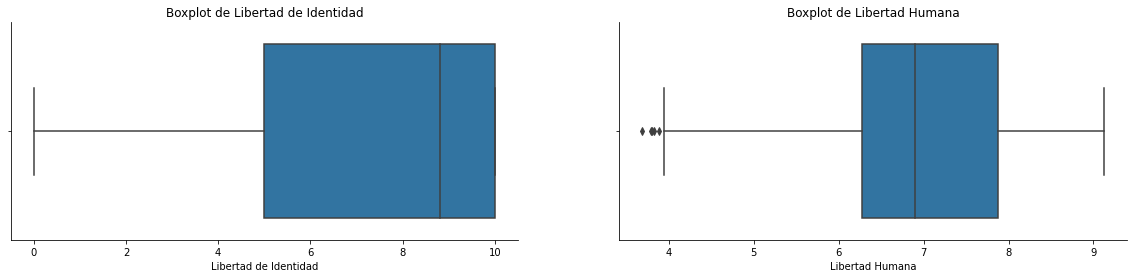

In [19]:
# Gráficamente podemos observar la presencia de outliers mediante un boxplot. Podemos observar valores atípicos en el segundo gráfico, en la variable Human Freedom

plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
sns.boxplot(x=dataset["pf_identity"])
plt.xlabel('Libertad de Identidad')
plt.title('Boxplot de Libertad de Identidad')
sns.despine()

plt.subplot(1, 2, 2)
sns.boxplot(x=dataset["hf_score"])
plt.xlabel('Libertad Humana')
plt.title('Boxplot de Libertad Humana')
sns.despine()

In [20]:
# Siguiendo el mismo método gráfico, encontramos los outliers a traves del IQR Score:

Q1 = dataset[["hf_score"]].quantile(0.25)
Q3 = dataset[["hf_score"]].quantile(0.75)
IQR = Q3 - Q1
outliers = dataset[["hf_score"]][((dataset[["hf_score"]] < (Q1 - 1.5 * IQR)) |(dataset[["hf_score"]] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.join(dataset[["countries","year"]])

,hf_score,countries,year
141,3.79,Syria,2017
157,3.80,Venezuela,2017
303,3.69,Syria,2016
465,3.83,Syria,2015
789,3.88,Syria,2013


## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

### 1) Grafiquen la media de la variable pf_identity y hf_score a través de los años.

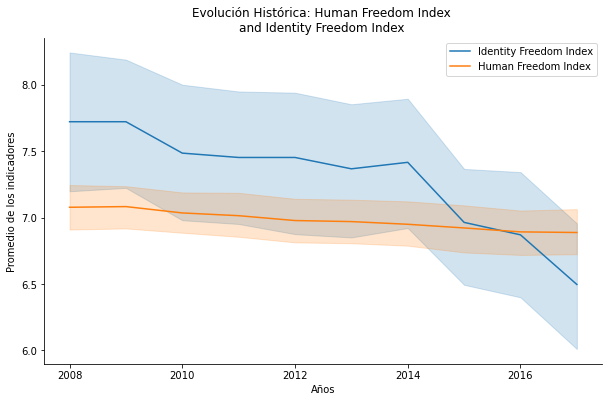

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=dataset, x='year', y='pf_identity', label= 'Identity Freedom Index',estimator='mean')
sns.lineplot(
    data=dataset, x='year', y='hf_score', label= 'Human Freedom Index',estimator='mean')
plt.xticks(rotation=0)
plt.ylabel('Promedio de los indicadores')
plt.title('Evolución Histórica: Human Freedom Index \nand Identity Freedom Index ')
plt.xlabel('Años')
plt.legend()
sns.despine()


En el gráfico se observa una tendencia descendente tanto en los indices de libertad humana como en el de libertad de identidad. La tendencia es muy marcada para el indice de libertad de identidad mostrando un deterioramiento en las condiciones de libertad de identidad en el mundo particularmente a partir del año 2014. 

### 2) Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

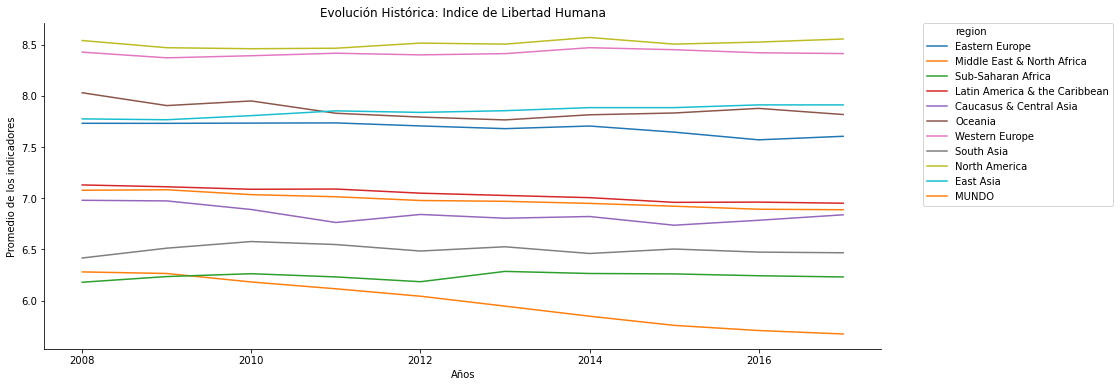

In [22]:
plt.figure(figsize=(15,6))
sns.lineplot(
    data=dataset, x='year', y='hf_score',estimator='mean', ci = None, hue='region')
sns.lineplot(
    data=dataset, x='year', y='hf_score',estimator='mean', ci = None, label='MUNDO')
plt.xticks(rotation=0)
plt.ylabel('Promedio de los indicadores')
plt.title('Evolución Histórica: Indice de Libertad Humana')
plt.xlabel('Años')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)  
sns.despine()

En la mayoria de las regiones el comportamiento es estable a lo largo de los años graficados. El comportamiento el leve comportamiento descendente de la media mundial se explica por la evolución de dos regiones en ese sentido, Latinoamerica y el Oriente Medio y Norte de Africa. Particularmente en esta región se observa un marcado deterioramiento en las condiciones de Libertad humana en el periodo analizado. 

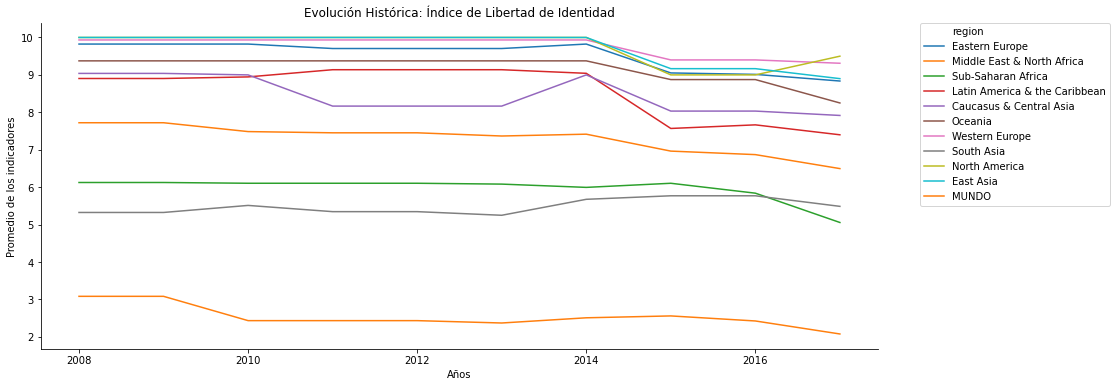

In [23]:
plt.figure(figsize=(15,6))
sns.lineplot(
    data=dataset, x='year', y='pf_identity',estimator='mean', ci = None, hue='region')
sns.lineplot(
        data=dataset, x='year', y='pf_identity',estimator='mean', ci = None, label='MUNDO')
plt.xticks(rotation=0)
plt.ylabel('Promedio de los indicadores')
plt.title('Evolución Histórica: Índice de Libertad de Identidad')
plt.xlabel('Años')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)  
sns.despine()

En el caso de la libertad de identidad vemos que el comportamiento de la media mundial se explica por un deterioramiento generalizado en la mayoria de las regiones, salvo el caso de America del Norte que presenta una mejora en los ultimos años de la muestra. 
De este analisis podemos concluir que si bien vemos que el mundo se encuentra estable con respecto a la evolución de la libertad humana, vemos que se observa un deterioramiento general por regiones de la libertad de identidad, en ambos casos considerando las excepciones comentadas. 

### 3) Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Para seleccionar los paises relevantes, calculamos la desviación estándar de los países a lo largo de los años y seleccionamos los 5 con mayor desviación estándar para graficarlo comparativamente con el valor para toda latinoamerica
Podemos observar gráficamente como la variación del indice para toda la latinoamérica tiene una gran disminución en los años en los que los países que seleccionamos para graficar bajan abruptamente

In [24]:
df_latin[["pf_identity","countries"]].groupby(["countries"]).std().sort_values(by ='pf_identity',ascending= False)

,pf_identity
countries,
Guyana,2.371708
Venezuela,2.109344
Paraguay,1.924231
Dominican Rep.,1.756132
Nicaragua,1.594051
Honduras,1.594051
El Salvador,1.594051
Brazil,1.594051
Haiti,1.532754


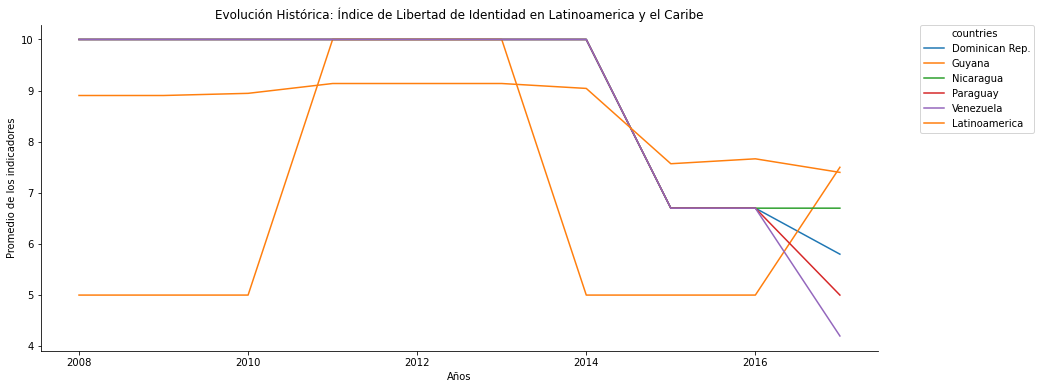

In [25]:
plt.figure(figsize=(15,6))
sns.lineplot(
    data=df_latin[df_latin.countries.isin(['Guyana', 'Venezuela','Paraguay','Dominican Rep.','Nicaragua'])], x='year', y='pf_identity',estimator='mean', ci = None, hue='countries')
sns.lineplot(
    data=df_latin, x='year', y='pf_identity',estimator='mean', ci = None, label='Latinoamerica')
plt.xticks(rotation=0)
plt.ylabel('Promedio de los indicadores')
plt.title('Evolución Histórica: Índice de Libertad de Identidad en Latinoamerica y el Caribe')
plt.xlabel('Años')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)  
sns.despine()

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


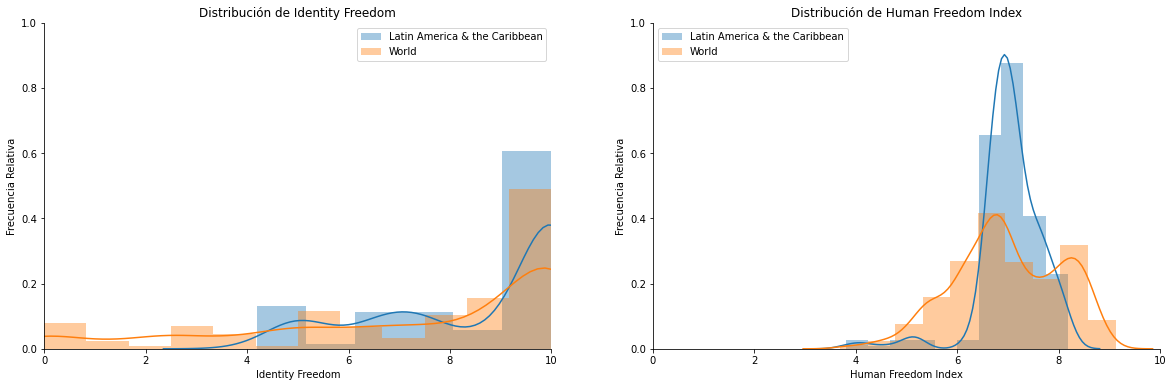

In [26]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
sns.distplot(
    df_latin.pf_identity, label='Latin America & the Caribbean') # 'Label' para imprimir la etiqueta de referencias
sns.distplot(
    df_world.pf_identity, label='World')
plt.legend() #Imprime la leyenda
plt.ylabel('Frecuencia Relativa')
plt.xlabel('Identity Freedom')
plt.title('Distribución de Identity Freedom')
plt.xticks(rotation=0)
plt.xlim(0, 10)
plt.ylim(0, 1)
sns.despine()

plt.subplot(1, 2, 2)
sns.distplot(
    df_latin.hf_score, label='Latin America & the Caribbean', bins=10) # 'Label' para imprimir la etiqueta de referencias
sns.distplot(
    df_world.hf_score, label='World', bins=10)
plt.legend() #Imprime la leyenda
plt.ylabel('Frecuencia Relativa')
plt.xlabel('Human Freedom Index')
plt.title('Distribución de Human Freedom Index')
plt.xticks(rotation=0)
plt.xlim(0, 10)
plt.ylim(0, 1)
sns.despine()

La variable de Libertad de identidad, presenta una distribución con multiples intervalos modales, siendo el mayor de ellos el asociado a los valores mas altos. En este caso la disperción entre los valores del indicador entre paises no permite asociar al histograma a una distribución conocida. 
Por otro lado la variable de libertad humana presenta histogramas compatibles con una distribución normal. Para el caso de latinoamerica con una curtosis mayor que una variable normal con valores mas concentrados alrededor de la moda que en una variable normal. 

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



1. Gráfico de Pairplot

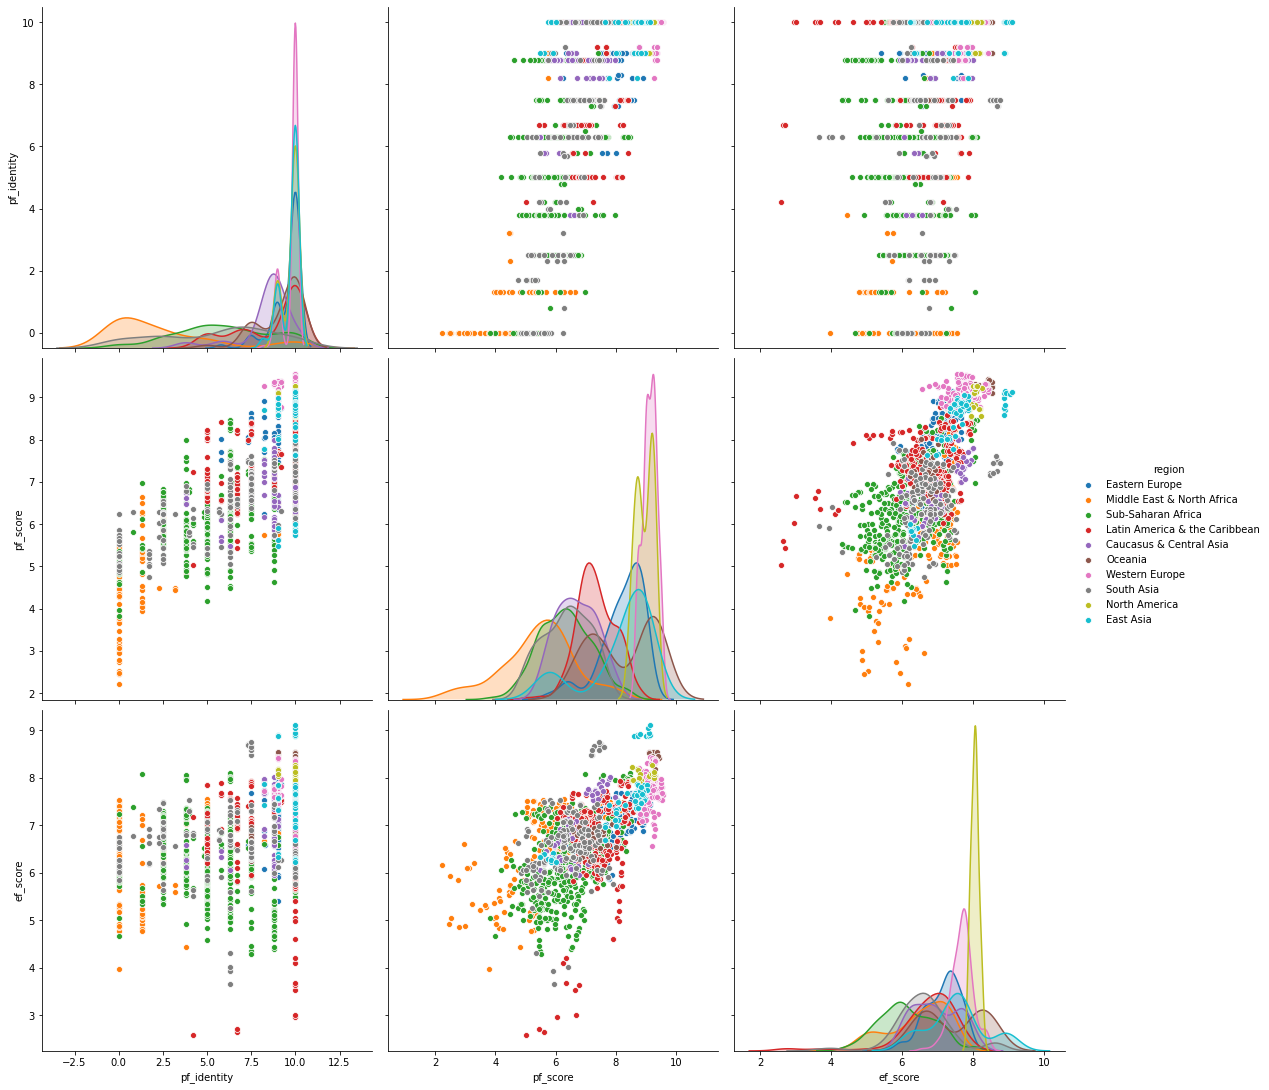

In [27]:
sns.pairplot(
    data=dataset,
    vars=['pf_identity', 'pf_score', 'ef_score'],
    hue='region', height=5)

Se observa una relación positiva entre el pf_score y el pf_identity, lo cual es razonable porque el pf_identity se utiliza para definir el pf_score. Este es un promedio ponderado de varias varible entre las que se encuentra el pf_identity. Por otro lado no se observa una relación definida entre el pf_identity y el ef_score. Pero si una relación positiva entre el ef_score y el pf_score, lo cual parece indicar una relación causal entre la libertad personal y económica.

2. Gráfico de correlación entre las variables

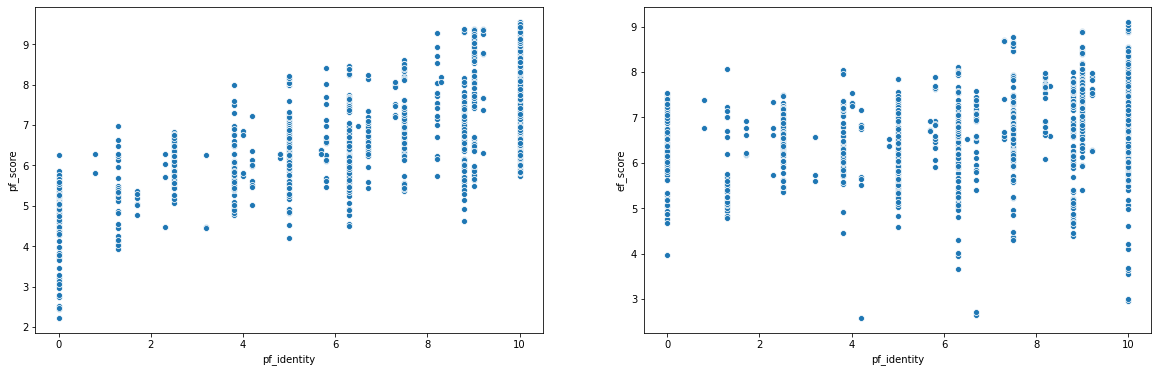

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.scatterplot(x="pf_identity", y="pf_score", data=dataset)

plt.subplot(1, 2, 2)
sns.scatterplot(x="pf_identity", y="ef_score", data=dataset)

Con el scatterplot, visualizamos la existencia de patrones en la relación entre las variables. Como mencionamos anteriormente se observa una relación positiva entre la libertad de identidad y el score de libertad personal, y no se percibe un patrón definido entre el score de libertad económica y la libertad de identidad. 

3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores high, medium y low. Utilizamos el criterio de definir tres intervalos iguales en extensión de la variable. 

In [29]:
_df = dataset
_df['pf_identity_cat']= pd.cut(_df['pf_identity'],3, labels=["low", "medium", "high"])
_df['pf_score_cat']= pd.cut(_df['pf_score'], 3, labels=["low", "medium", "high"])
_df['ef_score_cat']= pd.cut(_df['ef_score'],3, labels=["low", "medium", "high"])

_df_pf_identity_cat_count=_df.groupby('pf_identity_cat')['pf_identity_cat'].count()
_df_pf_score_cat_count=_df.groupby('pf_score_cat')['pf_score_cat'].count()
_df_ef_score_cat_count=_df.groupby('ef_score_cat')['ef_score_cat'].count()

print("Distribución de la Libertad de Identidad en categorias")
print(_df_pf_identity_cat_count)


Distribución de la Libertad de Identidad en categorias
pf_identity_cat
low        233
medium     303
high      1004
Name: pf_identity_cat, dtype: int64


Se observa claramente una mayor participación en la varible High, registrando mas del 50% de los casos

In [30]:
print("Distribución del Score de Libertad Personal en categorias")
print(_df_pf_score_cat_count)

Distribución del Score de Libertad Personal en categorias
pf_score_cat
low        49
medium    708
high      783
Name: pf_score_cat, dtype: int64


El score de libertad personal se encuentra dividido entre los niveles medium y high, encontrando muy pocos casos con un bajo nivel del ranking

In [32]:
print("Distribución del score de Libertad Económica en categorias")
print(_df_ef_score_cat_count)

Distribución del score de Libertad Económica en categorias
ef_score_cat
low        28
medium    775
high      737
Name: ef_score_cat, dtype: int64


El score de la Libertad económica también dividido entre los niveles medium y high registrando muy pocos casos de bajos niveles del ranking. 

In [35]:
_df_pf_identity_cat_count=_df.groupby(['pf_identity_cat','pf_score_cat'])['pf_identity_cat'].count()
print(_df_pf_identity_cat_count)

pf_identity_cat  pf_score_cat
low              low              44
                 medium          189
                 high              0
medium           low               4
                 medium          247
                 high             52
high             low               1
                 medium          272
                 high            731
Name: pf_identity_cat, dtype: int64


4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Este gráfico nos va a permitir entender como se presentan conjuntamente los indicadores estudiados.

Heatmap pf_identity y pf_score

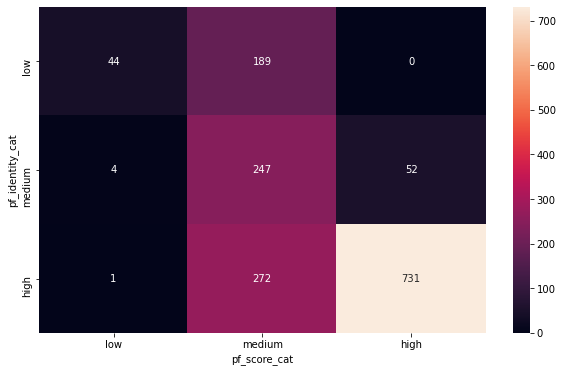

In [36]:
plt.figure(figsize=(10,6))
exp = pd.crosstab(_df.pf_identity_cat, _df.pf_score_cat)
sns.heatmap(exp, annot=True, fmt="d")

El gráfico nos muestra con colores mas claros las combinaciones que mas repiten. Asi altos niveles de libertad de identidad asociados a altos niveles del score de libertad personal es la combinación mas repetida, marcando además la influencia de la libertad individual en el score. 

Heatmap pf_identity y ef_score

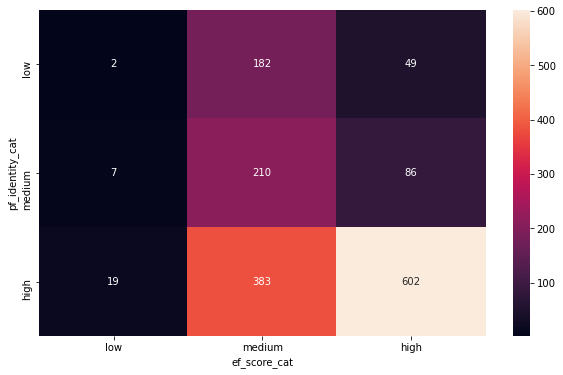

In [37]:
plt.figure(figsize=(10,6))
exp = pd.crosstab(_df.pf_identity_cat, _df.ef_score_cat)
sns.heatmap(exp, annot=True,fmt="d")

El gráfico nos muestra que una alta libertad de identidad asociada a un alta libertad económica es la combinación que mas se repite, mostrando además la baja cantidad de observaciones con bajo nivel de libertad económica.  

Heatmap ef_score y pf_score

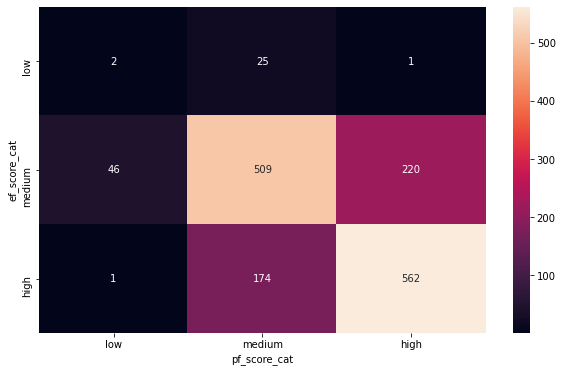

In [38]:
plt.figure(figsize=(10,6))
exp = pd.crosstab(_df.ef_score_cat, _df.pf_score_cat)
sns.heatmap(exp, annot=True,fmt="d")

En el gráfico observamos como las observaciones estan concentradas en los niveles altos y medios, siendo la combinación de alta libertad económica y personal la mas observada. 

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

La prueba de bondad de ajuste de Kolmogorov-Smirnov es una prueba no paramétrica que permite verificar si la distribución de datos empíricos de la muestra coincide con alguna distribución teórica específica.

La prueba consiste en plantear las siguientes hipótesis:

H0: Los datos analizados siguen una distribución G(x)

H1: Los datos analizados no siguen una distribución G(x)

En este caso en particular lo que queremos es verificar la normalidad de la función de distribución de las variables hf_score y pf_identity. Para ello, lo primero que debemos calcular son los parámetros muestrales para cada una de estas variables. Testearemos primero para el total de la muestra, luego repetiremos el procedimiento para AL y Norteamérica:

In [40]:
import scipy
from scipy import stats

**Parámetros Muestrales hf_score Global**

In [41]:
hf_score = dataset.hf_score.dropna()
loc_hf, scale_hf = stats.norm.fit(hf_score)

loc_hf, scale_hf

(6.978214285714285, 1.0558962430843073)

**Parámetros Muestrales pf_identity Global**

In [42]:
pf_identity = dataset.pf_identity.dropna()
loc_pf, scale_pf = stats.norm.fit(pf_identity)

loc_pf, scale_pf

(7.280649350649351, 3.1805438715105745)

La prueba de Kolmogorov-Smirnov sin ningún parámetro adicional, testea la distribución de nuestra muestra contra una distribución normal estándar con media 0 y desviación estándar 1. Si nuestros datos están normalmente distribuidos pero con una media y varianza diferentes a 0 y 1, la prueba no dará el resultado correcto.

Para solucionar este problema, consideramos dos opciones posibles:
1. Estandarizar nuestros parámetros
2. Incluir otros argumentos en la función ktest() que permitan realizar la prueba con parámetros no estandarizados.


**KS Test para hf_score Global**

In [43]:
scipy.stats.kstest(hf_score, 'norm', args=(loc_hf, scale_hf))

KstestResult(statistic=0.06497724505720437, pvalue=4.267579068369586e-06)

**KS Test para pf_identity Global**

In [44]:
scipy.stats.kstest(hf_score, 'norm', args=(loc_pf, scale_pf))

KstestResult(statistic=0.3056266716109661, pvalue=3.568813952696387e-128)

Observando los valores obtenidos para el p-value de ambas variables, estamos en condiciones de afirmar que a un nivel de significancia del 5% se rechaza la hipótesis nula de que las variables siguen una distribución normal.

Realizamos el mismo procedimiento pero ahora de manera individual para Latinoamérica y Norteamérica:

**KS Test para Latinoamérica**

In [45]:
latin = dataset[dataset.region == 'Latin America & the Caribbean']

In [46]:
#Parámetros hf_score para Latinoamérica
hf_score_la = latin.hf_score.dropna()
loc_hf_la, scale_hf_la = stats.norm.fit(hf_score_la)

loc_hf_la, scale_hf_la

(7.036976744186046, 0.6336654836706834)

In [47]:
#Parámetros pf_identity para Latinoamérica
pf_identity_la = latin.pf_identity.dropna()
loc_pf_la, scale_pf_la = stats.norm.fit(pf_identity_la)

loc_pf_la, scale_pf_la

(8.582170542635659, 1.8721934908121116)

In [48]:
#KS Test para hf_score Latinoamérica
scipy.stats.kstest(hf_score_la, 'norm', args=(loc_hf_la, scale_hf_la))

KstestResult(statistic=0.16770299427352894, pvalue=8.223362220413277e-07)

In [49]:
#KS Test para pf_identity Latinoamérica
scipy.stats.kstest(pf_identity_la, 'norm', args=(loc_pf_la, scale_pf_la))

KstestResult(statistic=0.3492111070640965, pvalue=1.258729000680362e-28)

Al igual que en el caso anterior donde se testeó la muestra global, se observa que los valores obtenidos para el p-value de ambas variables permite rechazar la hipótesis nula de que las variables siguen una distribución normal a un nivel de significancia del 5%

**KS Test para Norteamérica**

In [50]:
north = dataset[dataset.region == 'North America']

In [51]:
#Parámetros hf_score para Norteamérica
hf_score_north = north.hf_score.dropna()
loc_hf_no, scale_hf_no = stats.norm.fit(hf_score_north)

loc_hf_no, scale_hf_no

(8.511, 0.15436644713149292)

In [52]:
#Parámetros pf_identity para Norteamérica
pf_identity_north = north.pf_identity.dropna()
loc_pf_no, scale_pf_no = stats.norm.fit(pf_identity_north)

loc_pf_no, scale_pf_no

(9.75, 0.4330127018922193)

In [53]:
#KS Test para hf_score Norteamérica
scipy.stats.kstest(hf_score_north, 'norm', args=(loc_hf_no, scale_hf_no))

KstestResult(statistic=0.17961479572393468, pvalue=0.4904265080597438)

In [54]:
#KS Test para pf_identity Latinoamérica
scipy.stats.kstest(pf_identity_north, 'norm', args=(loc_pf_no, scale_pf_no))

KstestResult(statistic=0.46814856917461345, pvalue=0.0001537177752808075)

Nuevamente, se observa que los valores obtenidos para el p-value de ambas variables para Norteamérica permite rechazar la hipótesis nula de que las variables siguen una distribución normal a un nivel de significancia del 5%.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

**Variables sobre las que se realizará el análisis de correlación:**

In [55]:
columns = ['pf_identity','ef_score','hf_score']

**Coeficiente de Pearson**

El coeficiente de correlación de Pearson está pensado para variables cuantitativas y mide el grado de covariación entre distintas variables relacionadas linealmente. Los valores del coeficiente oscilan entre -1 y 1. Donde -1 indica una correlación negativa perfecta entre las variables y 1 una correlación positiva perfecta. Por otra parte, un valor de 0 indica que no existe correlación entre las variables testeadas.

In [56]:
dataset[columns].corr(method ='pearson')

,pf_identity,ef_score,hf_score
pf_identity,1.000000,0.359151,0.643354
ef_score,0.359151,1.000000,0.873325
hf_score,0.643354,0.873325,1.000000


**Coeficiente de Spearman**

El coeficiente de correlación de Spearman es una medida no paramétrica de la correlación de rango (dependencia estadística del ranking entre dos variables).Mide la fuerza y la dirección de la asociación entre dos variables clasificadas. 
Los valores del coeficiente oscilan entre -1 y 1. Donde -1 indica una correlación negativa perfecta entre las variables y 1 una correlación positiva perfecta. Por otra parte, un valor de 0 indica que no existe correlación entre las variables testeadas.

In [57]:
dataset[columns].corr(method ='spearman')

,pf_identity,ef_score,hf_score
pf_identity,1.000000,0.400777,0.649334
ef_score,0.400777,1.000000,0.880653
hf_score,0.649334,0.880653,1.000000


Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?